In [8]:
import numpy as np
import pandas as pd
import datetime
from dateutil.parser import parse
import requests, re, time
import pandas_datareader
import pickle
import math

import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.lines import Line2D
import matplotlib.patches as mpatches
import seaborn as sns 

import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.iolib.summary2 import summary_col
import linearmodels as ln
from pystout import pystout



import json
from pandas.io.json import json_normalize
from bs4 import BeautifulSoup
from selenium import webdriver
import time

import geopy.distance

In [15]:
Metro_Search = pd.read_csv('/Users/holger/Documents/Python/Harmsen_Repo/Metro-Study/Other data/Metro Search.csv')
Cityring_Search = pd.read_csv('/Users/holger/Documents/Python/Harmsen_Repo/Metro-Study/Other data/Cityring Search.csv')

In [16]:
Metro_Search.columns = ['Metro']
Cityring_Search.columns = ['Cityring']
Metro_Search = Metro_Search.drop(['Måned'])
Cityring_Search = Cityring_Search.drop(['Måned'])

In [17]:
Metro_Search = pd.merge(Metro_Search,Cityring_Search,how='outer',left_index=True,right_index=True)
Metro_Search['Month'] = Metro_Search.index.to_list()

In [18]:
Metro_Search

,Metro,Cityring,Month
2004-01,68,0,2004-01
2004-02,67,0,2004-02
2004-03,60,0,2004-03
2004-04,47,0,2004-04
2004-05,55,0,2004-05
...,...,...,...
2020-03,29,5,2020-03
2020-04,20,1,2020-04
2020-05,23,5,2020-05
2020-06,31,5,2020-06


In [19]:
Metro_Search['Metro'] = pd.to_numeric(Metro_Search['Metro'])
Metro_Search['Cityring'] = pd.to_numeric(Metro_Search['Cityring'])
Metro_Search['Month'] = pd.to_datetime(Metro_Search['Month'])

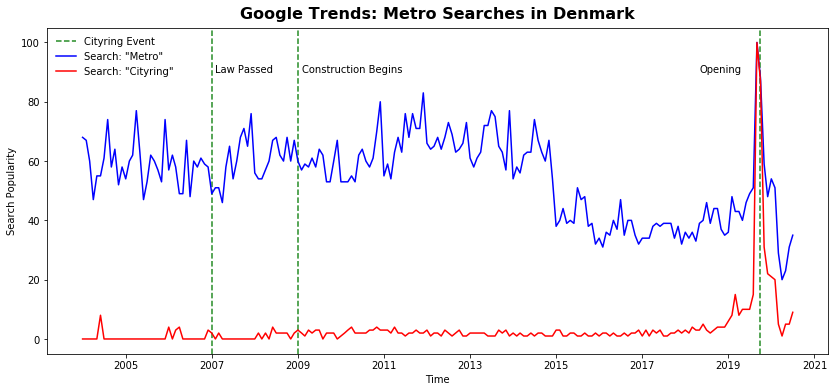

In [20]:
#Setting up the figure:
fig = plt.figure(figsize=(14,6), frameon=False)
title_font = {'size':'16', 'color':'black', 'weight':'bold',
              'verticalalignment':'bottom'}
plt.title('Google Trends: Metro Searches in Denmark',**title_font)
#plt.axis('off')

plt.axvline(pd.to_datetime('2019-09-30'),linestyle='--',c='forestgreen')
plt.axvline(pd.to_datetime('2009'),linestyle='--',c='forestgreen')
plt.axvline(pd.to_datetime('2007'),linestyle='--',c='forestgreen',label = 'Cityring Event')

t = plt.text(pd.to_datetime('2018-05-01'), 90, 'Opening')
t = plt.text(pd.to_datetime('2009-02-01'), 90, 'Construction Begins')
t = plt.text(pd.to_datetime('2007-02-01'), 90, 'Law Passed')


#Figure 1
plt.plot(Metro_Search['Month'],Metro_Search['Metro'], label = f'Search: "Metro"',c='blue')
plt.plot(Metro_Search['Month'],Metro_Search['Cityring'], label = f'Search: "Cityring"', c='red')
plt.ylabel('Search Popularity')
plt.xlabel('Time')

legend1 = plt.legend(loc = 'upper left', frameon=False)

plt.savefig('/Users/holger/Documents/Python/Harmsen_Repo/Metro-Study/Other data/Google Trends.pdf')